# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
#data loading
data=pd.read_csv('SalaryData_Train(1).csv')

In [3]:
#data set is too big becaus of that selecting sampple (5000) for perfoming 
train_df=data.sample(5000)
train_df.shape

(5000, 14)

# Data preprocessing

In [4]:
train_df=train_df.drop_duplicates()

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_df['workclass']=encoder.fit_transform(train_df['workclass'])
train_df['education']=encoder.fit_transform(train_df['education'])
train_df['maritalstatus']=encoder.fit_transform(train_df['maritalstatus'])
train_df['occupation']=encoder.fit_transform(train_df['occupation'])
train_df['relationship']=encoder.fit_transform(train_df['relationship'])
train_df['race']=encoder.fit_transform(train_df['race'])
train_df['sex']=encoder.fit_transform(train_df['sex'])
train_df['native']=encoder.fit_transform(train_df['native'])
train_df['Salary']=encoder.fit_transform(train_df['Salary'])

In [6]:
train_df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,38.771452,2.197814,10.283622,10.103548,2.584365,6.013201,1.405528,3.688944,0.676774,1012.808581,87.846122,40.978960,34.340140,0.247112
std,13.207512,0.973053,3.844594,2.607381,1.502182,4.028400,1.604662,0.814928,0.467756,6856.575639,403.465733,12.343176,6.048769,0.431377
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,36.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,36.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,36.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,38.000000,1.000000


## **Applying PCA**

In [7]:
from sklearn.preprocessing import scale
arry=scale(train_df.values)
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca_train_values=pca.fit_transform(arry)
pca_train_values

array([[-8.77331994e-01,  5.90213285e-01,  4.11228084e-01,
         2.17222666e+00,  5.13939940e-01, -1.11986405e+00],
       [ 3.59645791e-02,  8.44715475e-01, -1.04424419e-01,
         1.45585391e+00,  1.36749352e-01, -6.41438404e-01],
       [-1.50769292e+00,  1.66055013e+00,  1.98741288e+00,
         4.20027523e-01, -6.62174681e-01,  2.12542299e+00],
       ...,
       [-1.34834304e+00,  4.04377873e-02,  6.11479486e-01,
        -1.08882638e+00, -3.91790325e-01,  5.60776160e-01],
       [ 7.74944637e-01,  8.35326270e-01,  3.20940134e-03,
         4.14451931e-01, -8.55001006e-02,  1.20806061e-01],
       [-3.26521339e+00, -1.00101592e+00, -4.42933459e-01,
         5.81740694e-01,  4.92391726e-01,  6.77690606e-02]])

In [8]:
variance=pca.explained_variance_ratio_
var1=np.cumsum(np.round(variance,decimals=4)*100)
var1

array([16.61, 26.99, 35.25, 43.29, 50.74, 57.83])

In [9]:
finaltrain = pd.DataFrame(pca_train_values[:,0:4])
                     
finaltrain

,0,1,2,3
0,-0.877332,0.590213,0.411228,2.172227
1,0.035965,0.844715,-0.104424,1.455854
2,-1.507693,1.660550,1.987413,0.420028
3,1.670774,0.323989,-0.193117,-0.887649
4,0.034435,-3.116676,0.086603,1.290289
...,...,...,...,...
4843,0.695664,-0.940988,-0.452965,1.098447
4844,-2.550343,-2.783608,1.853407,-2.087126
4845,-1.348343,0.040438,0.611479,-1.088826
4846,0.774945,0.835326,0.003209,0.414452


In [10]:
x=finaltrain
y=train_df["Salary"]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

# SVM Model

In [13]:
model=SVC()
param_grid = [{'kernel': ['rbf'], 
               'gamma': [1, 0.1, 0.01, 0.001],
               'C': [ 10, 1,0.5]}]
GSV=GridSearchCV(model,param_grid,cv=10)
GSV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 1, 0.5], 'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}])

In [14]:
GSV.best_params_ , GSV.best_score_ 

({'C': 1, 'gamma': 1, 'kernel': 'rbf'}, 0.9549028283879922)

In [15]:
model = SVC(C= 1,gamma= 1,kernel='rbf')
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 96.08247422680412


array([[1090,   28],
       [  29,  308]], dtype=int64)

In [17]:
model2 = SVC(C= 1,gamma= 1,kernel='poly')
model2.fit(x_train , y_train)
y_pred2 = model2.predict(x_test)
acc2 = accuracy_score(y_test, y_pred2) * 100
print("Accuracy =", acc2)
confusion_matrix(y_test, y_pred2)

Accuracy = 94.2955326460481


array([[1091,   27],
       [  56,  281]], dtype=int64)

Accuracy of final Model= 96.08247422680412


<AxesSubplot:>

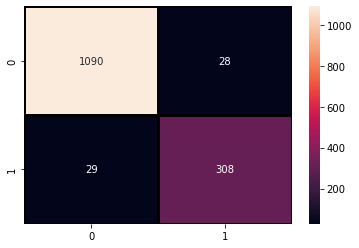

In [16]:
print("Accuracy of final Model=", acc)
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)

# Accuracy of final Model= 96.08 with C= 1,gamma= 1,kernel='rbf'